# Assignment 02

## 311 Cases in San Francisco

For this assignment, I chose to look at two call types that relate to homelessness in San Francisco's open source 311 dataset. Recently there has been lots of news coverage about an increaste in human waste on the streets of San Francisco. The New York Times released an [article](https://www.nytimes.com/2018/10/08/us/san-francisco-dirtiest-street-london-breed.html) on the issue in October, 2018.

**NOTE**: I was unable to use the full 311 call dataset because it would only load with pandas sometimes. I am not sure why this is (probably because my computer is **W E A K** and **s m a l l**. I tried using chunksize to iterate through smaller dataframes in order to do operations in memory, but it wasn't working. I'd like to arrange office hours so I can show you the problem I was having and explore options to fix it, as I would like to look at the entire (1+ gb) dataset for my final project. 

I eventually gave up to and used a subset of the data set for the assignment, and I have the original jupyter notebook I was working on still because I want to fix it. I chose to look at only two request types, requests about human waste and requests about encampments. 

In [1]:
# import the libraries we want to use
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# read our csv
df = pd.read_csv('hw_and_enc.csv', index_col="Opened", parse_dates=True)

In [3]:
# make two subset dataframes for the two call types we are looking at 
human_waste = df[(df['Request Type'] == 'Human Waste')]
encampments = df[(df['Request Type'] == 'Encampment Reports')]

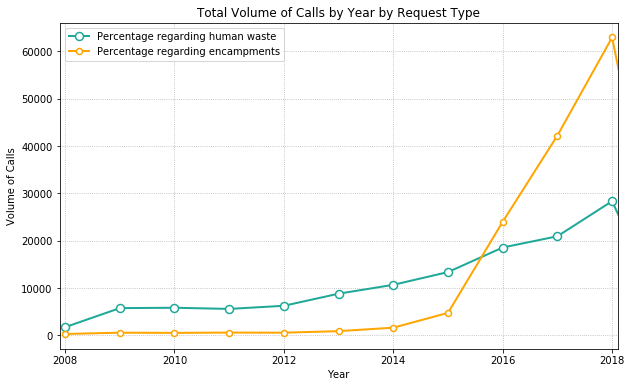

In [4]:
# group by year and look at how many calls occured by year 
hw_yearly = human_waste.groupby(human_waste.index.year).size()
enc_yearly = encampments.groupby(encampments.index.year).size()

# plot raw total number of calls on the same axis 
ax = hw_yearly.plot(kind='line', figsize=(10, 6), lw=2, c='#1fa898',
                    marker='o', markerfacecolor='w', markeredgewidth=1.5,
                        label='Percentage regarding human waste', markersize=8)
ax = enc_yearly.plot(kind='line', figsize=(10, 6), lw=2, c='orange',
                    marker='o', markerfacecolor='w', markeredgewidth=1.5, 
                          label='Percentage regarding encampments')

ax.set_xlabel('Year')
ax.set_xlim(2007.9,2018.1)
ax.set_ylabel('Volume of Calls')
ax.set_title('Total Volume of Calls by Year by Request Type')

ax.grid(ls=':')
ax.legend()
plt.show()

### Total Volume of Calls by Year by Request Type

This graph shows the total volume of calls by year, with separate lines for each request type we are looking at. This is essentially the raw data that we are looking at. This visual allows us to see the total volume of calls, unadulterated. This is worthwhile because the total volume may reflect the amount of calls received about human waste and encampments. 

Unfortunately, because I am unable to load the entire dataset, we cannot comare this to the trend of total 311 calls coming in. 

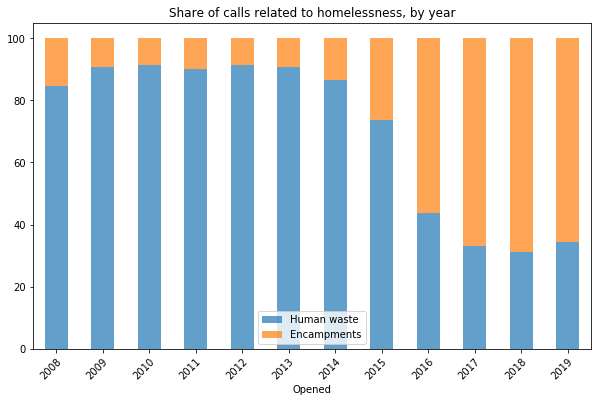

In [5]:
calls_yearly = df.groupby(df.index.year).size()
prop_hw_yearly = (hw_yearly / calls_yearly) * 100
prop_enc_yearly = (enc_yearly / calls_yearly) * 100

share = pd.DataFrame([prop_hw_yearly, prop_enc_yearly], 
                     index=['Human waste', 'Encampments']).T
ax = share.plot(figsize=(10, 6), kind='bar', alpha=0.7, stacked=True, 
                       title='Share of calls related to homelessness, by year')
ax.set_xticklabels(share.index, rotation=45, rotation_mode='anchor', ha='right')
plt.show()

### Share of Calls

This graph shows how many calls were related to either human waste or encampments, relative to the total call volume for the subset of the data we are looking at. This helps us see how the types of calls related to homelessness are changing relative to each other. We can see from this graph that proportionally, there were more calls about human waste, but as time progressed, more calls about encampments began coming in. 

This graph can be misleading because it looks like there are less calls regarding human waste, but we know from the plot above this one that this is not true. 

In [6]:
# create empty dataframe to hold our results
months_by_year = pd.DataFrame()

# loop through each year and get share of calls by month for each year
# we are adding 1 to each year so that we skip over the year 2008 because data for 2008
# starts in August. If we include 2008, then the dataframe ends up starting at August and 
# only going to December (yucky)
for year in calls_yearly.index:
    # mask dataset by year
    masked = df[df.index.year==(year+1)]
    
    # find the number of calls by month 
    months_by_year[str(year+1)] = masked.groupby(masked.index.month).size()

# remove the years without complete data 
months_by_year = months_by_year.drop(['2019', '2020'], axis=1)

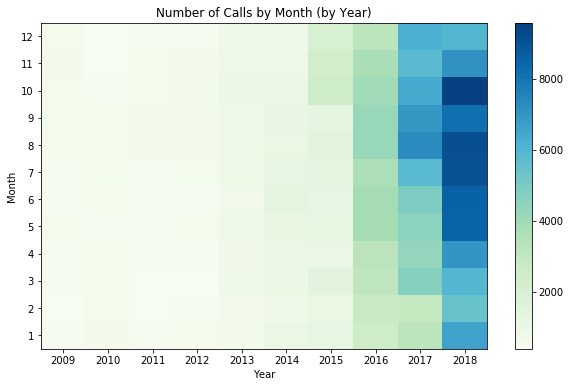

In [7]:
# use matplotlib to make a heatmap! 
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)

plot = plt.pcolor(months_by_year, cmap="GnBu")
fig.colorbar(plot, ax=ax)
plt.yticks(np.arange(0.5, len(months_by_year.index), 1), months_by_year.index)
plt.xticks(np.arange(0.5, len(months_by_year.columns), 1), months_by_year.columns)
ax.set_title('Number of Calls by Month (by Year)')
ax.set_xlabel('Year')
ax.set_ylabel('Month')
plt.show()

### Heatmap of Call Volume by Month and Year

This graph helps us compare months and years at the same time. This graph allows us to see that there is a growth in calls beginning in 2016. We can also see that in 2018 there were more calls in the summer months, through October, than in the rest of that year. 

In [8]:
# create empty dataframe to hold our results
share_months_by_year = pd.DataFrame()

# loop through each year and get share of calls by month for each year
# we are adding 1 to each year so that we skip over the year 2008 because data for 2008
# starts in August. If we include 2008, then the dataframe ends up starting at August and 
# only going to December (yucky)
for year in calls_yearly.index:
    # mask dataset by year
    masked = df[df.index.year==(year+1)]
    
    # find the number of calls by month 
    share_months_by_year[str(year+1)] = (masked.groupby(masked.index.month).size()/masked.groupby(masked.index.month).size().sum()) 

# remove the years without complete data 
share_months_by_year = share_months_by_year.drop(['2019', '2020'], axis=1)

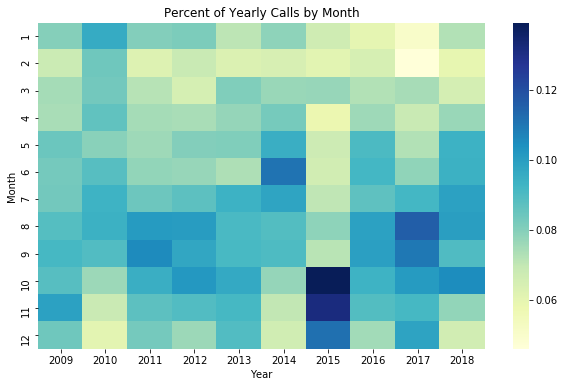

In [9]:
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)

plot = sns.heatmap(share_months_by_year, 
            ax=ax, cmap="YlGnBu").set_title('Share of calls by Month (by Year)')
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Percent of Yearly Calls by Month") 
plt.show(plot)

### Percent of Yearly Calls by Month

This graph lets us explore trends across months by showing the percentage of that year's calls that occured in a given month. We can see from this graph that there are relatively fewer calls coming in during Februaries, and more coming in during the summer months, through fall. 